In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
combined=pd.read_csv('combined_data.csv')
len(combined)

31886

In [3]:
combined.head()

,source_name,url,created_date,tag,heading,author,article_text,label
0,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-06-29 00:00:00,"homes, construction, larkfield, estates, worke...",Larkfield\xe2\x80\x99s returning residents cop...,GUY KOVNER,\nHaley and Fletcher Skerrett loved suburban L...,regular
1,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-16 00:00:00,"hospital, fire, rosa, santa, tito, fires, jose...",'You felt more normal': St. Joseph Health empl...,MARTIN ESPINOZA,\nThere is little sign today of the smoke-lace...,regular
2,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-23 00:00:00,"sandy, sonoma, angie, center, luz, sisters, co...",Sonoma Valley sisters join forces to give fire...,DIANNE REBER HART,\nWhen the North Bay wildfires broke out in 20...,regular
3,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-03 00:00:00,"campus, teachers, hidden, students, valley, sa...",Santa Rosa teachers rebuild sense of safety on...,MATT VILLANO,\nThe rebuilding process has taken many forms ...,regular
4,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-01 00:00:00,"fire, montecito, heights, neighbors, flames, n...",\xe2\x80\x98I had to get it down\xe2\x80\x99: ...,CHRIS SMITH,\nWe\xe2\x80\x99ll never know if retired schoo...,regular


In [9]:
combined['label'].replace('0','regular',inplace=True)
combined['label'].replace('1','editorial',inplace=True)
combined['label'].replace('2','oped',inplace=True)
combined['label'].value_counts()

regular      28991
opinion       1056
oped           648
guest          491
editorial      456
other          244
Name: label, dtype: int64

In [19]:
source=[]
regular=[]
non_regular=[]
for s in list(combined['source_name'].unique()):
    subset=combined[combined['source_name']==s]
    r=len(subset[subset['label']=='regular'])
    nr=len(subset[subset['label']!='regular'])
    source.append(s)
    regular.append(r)
    non_regular.append(nr)

In [22]:
regular

[3426, 5368, 4447, 1624, 1732, 2349, 4913, 1412, 3720]

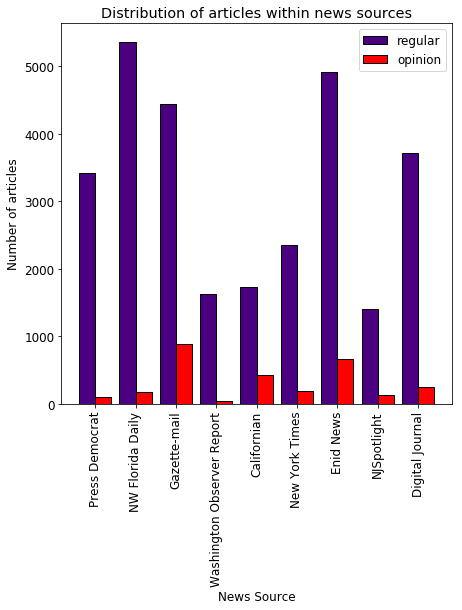

In [159]:
_X = np.arange(len(source))*8
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(7,7))
plt.bar(_X - 1.6, regular, 3.2,color='indigo',edgecolor='black')
plt.bar(_X + 1.6, non_regular, 3.2,color='red',edgecolor='black')
plt.xticks(_X, source,rotation=90) # set labels manually
plt.legend(['regular','opinion'])
plt.xlabel('News Source')
plt.ylabel('Number of articles')
plt.title('Distribution of articles within news sources')
plt.savefig('Fig1.png')
plt.show()


In [59]:
combined['word_count']=combined['article_text'].apply(lambda x: len(str(x).split(" ")))

In [93]:
combined[combined['word_count']==max(combined['word_count'])]

,source_name,url,created_date,tag,heading,author,article_text,label,words,word_count
20346,New York Times,http://www.nytimes.com/2016/01/18/us/politics/...,2016-01-17 23:51:27,Politics,Transcript of the Democratic Presidential Debate,Not available,Following is a transcript of the Democratic de...,regular,"[Following, is, a, transcript, of, the, Democr...",15900


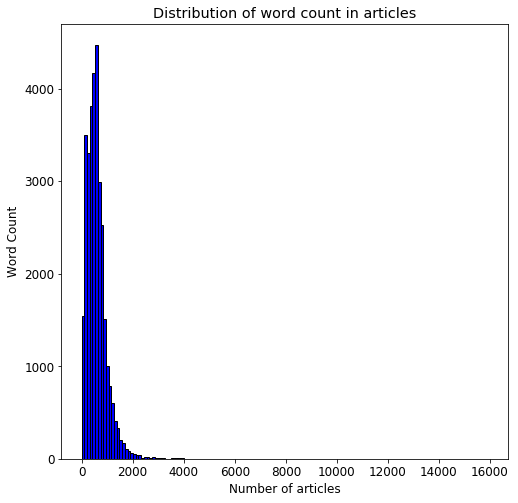

In [155]:
_=plt.figure(figsize=(8,8))
_=plt.hist(combined['word_count'],bins=150,color='blue',edgecolor='black')
_=plt.ylabel('Word Count')
_=plt.xlabel('Number of articles')
_=plt.title('Distribution of word count in articles')
_=plt.savefig('Fig2.png')
_=plt.show()


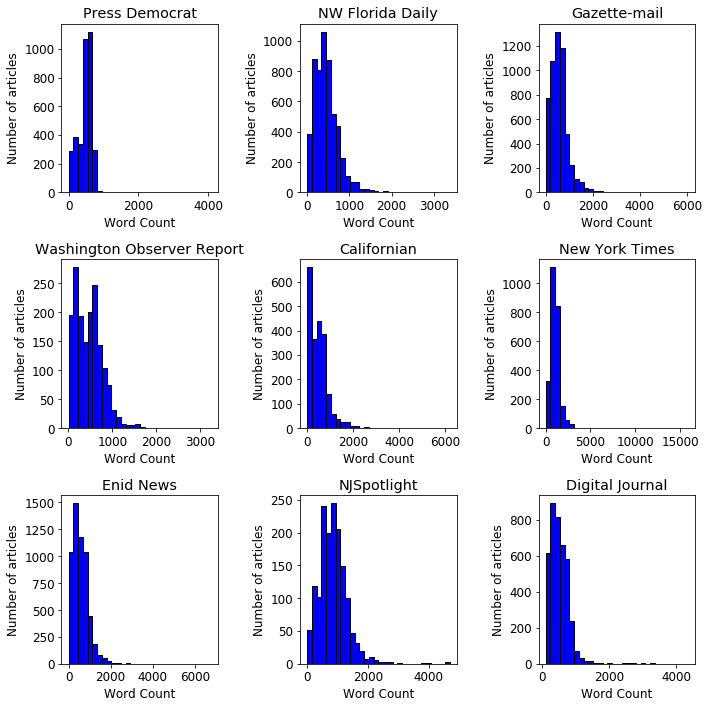

In [156]:
plt.figure(figsize=(10,10))
for i in range(len(source)):
    ax=plt.subplot(3,3,i+1)
    subset=combined[combined['source_name']==source[i]]
    ax.hist(subset['word_count'],bins=30,color='blue',edgecolor='black')
    ax.set_title(source[i])
    ax.set_xlabel('Word Count')
    ax.set_ylabel('Number of articles')
#plt.suptitle('Distribution of Word Count per source')
plt.tight_layout()
plt.savefig('Fig3.png')
plt.show()
